# __4장 분류__
--- 

## __04_01 분류의 개요__
--- 
- 지도학습은 label 즉, 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 러신머닝 방식이다.<br><br>
- 지도학습의 대표 유형인 분류는 기존 데이터가 어떤 레이블에 속하는 지 패턴을 알고리즘으로 인지한 후 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다. <br><br>
- 분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.<br>
1.베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)<br>
2.독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)<br>
3.데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)<br>
4.개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)<br>
5.근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘<br>
6.심층 연결 기반의 신경망(Neural Network)<br>
7.서로 다른 머신러닝 알고리즘을 결합한 앙상블(Ensemble)<br>

---
- __앙상블 방법(Ensemble Method)__은 분류에서 가장 각광받는 방법 중 하나
<br><br>
- 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능을 가져 애용된다!
<br><br>
- 앙상블의 __배깅(Bagging) & 부스팅(Boosting)__
    
    - 배깅의 대표 방식인 __랜덤 포레스트(Random Forest)__는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용한다.
    <br><br>
    - 부스팅의 __그래디언트 부스팅(Gradient Boosting)__은 뛰어난 예측 성능을 가지지만 수행 시간이 너무 오래 걸려 최적화 모델 튜닝이 어려웠지만, XgBoost와 LightGBM 등 예측 성능을 한 단계 발전하면서 수행 속도를 줄인 알고리즘이 계속 등장하며 활용도가 높아졌다.

---
- 4장에서 앙상블 방법의 개요와 랜덤 포레스트, 그래디언트 부스팅의 전통적인 앙상블 기법 + 부스팅 계열의 최신 기법 XgBoost, LightGBM, 스태킹 기법을 알아본다.
<br><br>
- 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 __결정 트리(Decision Tree)__이다.
    - 결정 트리는 매우 쉽고 유연하게 적용할 수 있는 알고리즘, 데이터 사전 가공의 영향이 매우 적다.
    <br><br>
    - 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하고, 그로 인한 과적합(overfitting)이 발생해 예측 성능이 저하될 수도 있다. 하지만 이 점이 앙상블 기법에서 장점으로 작용한다.
    <br><br>
    - 앙상블은 많은 예측이 상대적으로 떨어지는 학습기(약한 학습기)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시킨다. 결정트리가 좋은 약한 학습기가 된다.

## __04_02 결정 트리__ 
--- 
- __결정트리__: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
    - 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가! 알고리즘의 성능
<br><br>
- __규칙 노드(Decision Node)로__ 표시한 결정트리의 구조 사진
- 계속해서 조건을 만들 때마다 서브트리가 만들어진다. 규칙이 많을수록 분류 결정이 복잡해지고 과적합으로 이어지기 쉽다. 트리의 깊이(depth)가 깊어질수록 결정트리의 예측 성능이 저하되기 쉽다.
- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지기 위해 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 한다. 
    - 분할을 어떻게 할 것인지가 중요. __균일한 데이터 세트__를 구성하도록 분할

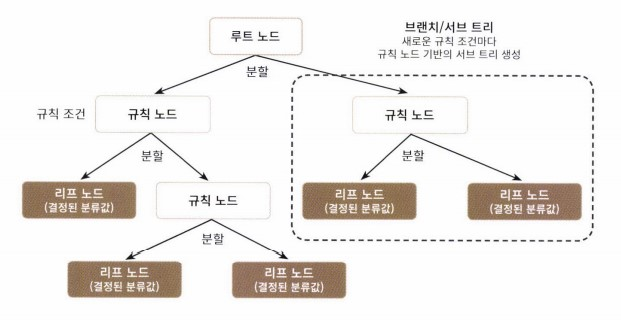

---
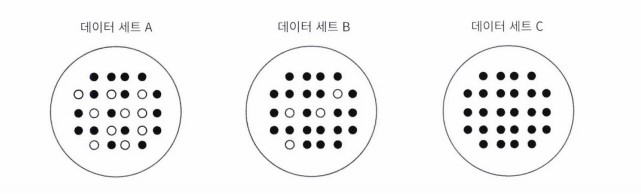
- 균일도는 C, B, A 순으로 높다.
- 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
<br><br>
- 결정노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 
- 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측한다.


--- 
정보의 균일도를 측정하는 방법은 엔트로피를 이용한 __정보 이득(Information Gain) 지수__와 __지니 계수__가 있다.
- __정보이득__은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여있으면 엔트로피가 높고, 서로 같은 값이 섞여있으면 엔트로피가 낮다. <br> __정보 이득 지수 = 1 - 엔트로피지수__<br> 정보 이득 지수가 높은 속성을 기준으로 분할한다. 
<br><br>
- __지니 계수__는 0이 가장 평등하고, 1에 가까울수록 불평등하다. 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우에는 불평등한 값이 된다. <br>
다양성이 낮을수록 균일도가 높다는 의미에서 1로 갈수록 균일도가 높으므로, 지니 계수가 높은 속성을 기준으로 분할한다.
<br><br>
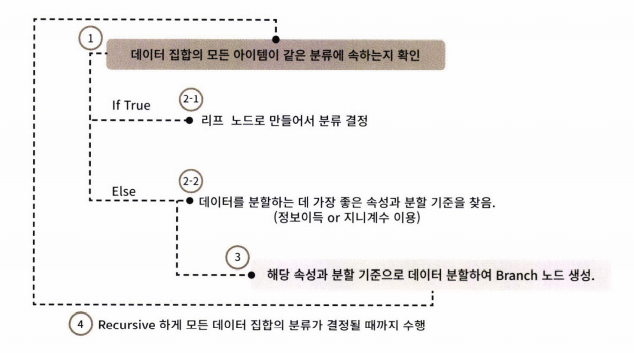
<br>
- Decision Tree Classifier는 기본으로 지니 계수를 이용해 데이터를 분할한다.
<br><br>
- 정보 이득이나 지니 계수가 높은 조건을 찾아 지식트리노드에 걸쳐 반복적으로 분할한 뒤 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.
---

### 결정 트리 모델의 특징
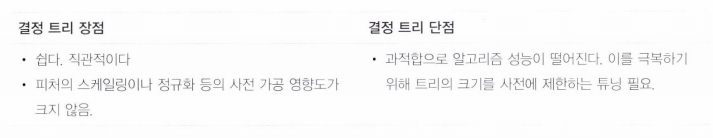
<br><br>
- 복잡한 학습 모델은 실제 상황에 유연하게 대처할 수 없어 예측 성능이 떨어질 수밖에 없다. 
- 모든 데이터 상황을 만족하는 완벽한 규칙은 만들수 없다고 생각하고, 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움이 된다.
---

### 결정 트리 파라미터
사이킷런의 결정 트리 알고리즘을 구현한 클래스: 
<br>분류를 위한 __DecisionTreeClassifier__  & 회귀를 위한 __DecisionTreeRegressor__ 클래스
- 사이킷런의 결정 트리 구현은 CART 알고리즘 기반으로, 분류뿐만 아니라 회귀에서도 사용할 수 있는 트리 알고리즘이다. 위의 두 클래스는 모두 같은 파라미터를 사용한다. 
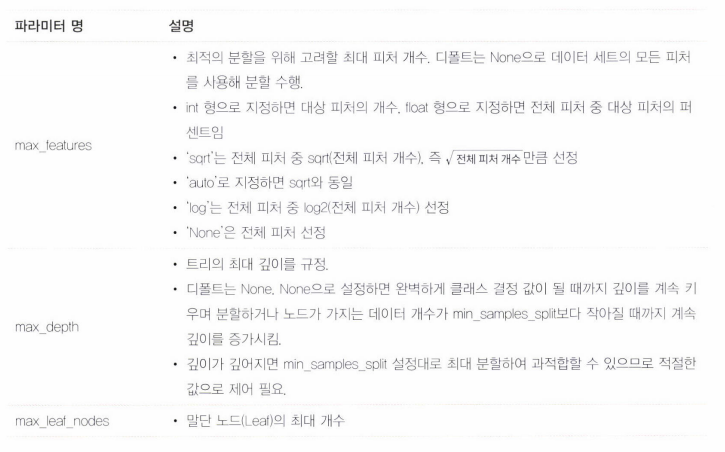
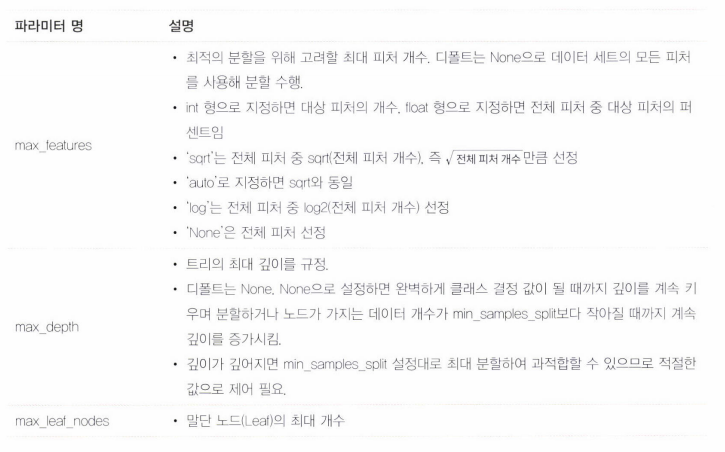
---

### 결정 트리 모델의 시각화
Graphviz 패키지를 사용해 결정트리 알고리즘을 시각화한다. 사이킷런은 export_graphviz()를 제공
- __export_graphviz()__의 인자: 학습이 완료된 Estimator, feature의 이름 리스트, label 이름 리스트
- 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해서 반환해준다.
<br><br>
- Graphviz는 파이썬이 아닌 C/C++로 만들어진 패키지라서 파이썬과 인터페이스할 수 있는 파이썬 래퍼 모듈을 별도로 설치해야 한다. 
<br><br>
https://graphviz.org/download/

In [1]:
!pip install graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩, 학습 데이터와 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(presort=False, random_state=156)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True) 

In [5]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph) 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

__리프노드__: 더 이상 자식 노드가 없는 노드 > 최종 클래스(레이블) 값이 결정되는 노드
<br> 리프노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다. 
<br><br>
- petal length(cm) <= 2.45 와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건<br> 규칙 조건이 없다면 리프노드이다.
- gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value=[ ]는 클래스 값 기반의 데이터 건수이다. <br>만약 Value=[41, 40, 39]라면 클래스 값 순서로 41, 40, 39개씩 가지고 있는 것
---

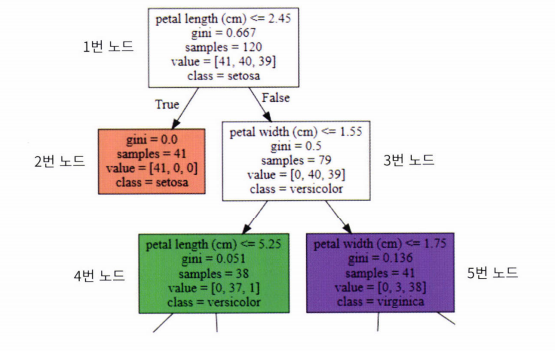
<br><br>
---
각 __노드의 색__은 붓꽃 데이터의 레이블 값을 의미한다.
- 주황색: 0 Setosa / 초록색: 1 Versicolor / 보라색: 2 Virginica
- 색이 짙을수록 지니 계수가 낮고, 해당 레이블에 속하는 샘플 데이터가 많다는 의미
<br><br>
#### 1번 노드 
- __samples=120__ 전체 데이터가 120개라는 의미
- __value=[41,40,39]__ Satosa 41개, Versicolor 40개, Virginica 39개로 구성
- sample 120개가 value=[41,40,39]의 분포도로 되어 있으므로 __지니 계수는 0.667__
- __petal length(cm) <= 2.45__ 규칙으로 자식 노드 생성
- __class=setosa__ 하위 노드를 가질 경우에 setosa의 개수가 41개로 가장 많다는 의미
<br><br>
#### 2번 노드 _ _ petal length(cm)<=2.45 가 True인 규칙 노드
- 41개의 샘플 모두 Setosa이므로 예측 클래스는 Setosa로 결정
- 지니 계수=0
<br><br>
#### 3번 노드 _ _ petal length(cm)<=2.45 가 False인 규칙 노드
- 79개의 샘플 데이터 중 Vesicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙이 필요하다
- petal width(cm) <= 1.55 규칙으로 자식 노드 생성
<br><br>
#### 4번 노드 _ _ petal width(cm)<=1.55가 True인 규칙 노드
- 38개의 샘플 데이터 중 Versicolor 37개, Virginica 1개로 대부분이 Versicolor이다.
- 지니계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 섞여있으므로 
<br>petal length(cm) <= 5.25라는 새로운 규칙으로 다시 자식 노드를 생성한다.
<br><br>
#### 5번 노드 _ _ petal width(cm)<=1.55가 False인 규칙 노드
- 41개의 샘플 데이터 중 Vesicolor 3개, Virginica 38개로 대부분이 Virginica이다.
- 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 섞여있으므로 
<br>petal width(cm) <= 1.75라는 새로운 규칙으로 다시 자식 노드를 생성한다. 
---

__결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 간다. 결국 매우 복잡한 규칙트리가 만들어져 모델이 쉽게 과적합된다.__
<br><br>
대부분의 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다. 
<br><br>
- __max depth( )__로 결정 트리의 최대 트리 깊이를 제어한다.<br> 3으로 설정한다면 트리 깊이가 설정된 max_depth에 따라 줄어들면서 더 간단한 결정 트리가 된다.
- __min_samples_split( )__로 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수를 정한다. 
- __min_samples_leaf( )__로 리프 노드가 될 수 있는 샘플 데이터 건수의 최소를 정한다. <br> 리프 노드가 될 수 있는 조건은 디폴트 1이다. min_samples_leaf의 값을 키우면 더이상 분할하지 않고도 리프 노드가 될 수 있는 조건이 완화된다. 지정한 조건만 만족하면 리프 노드가 될 수 있다. 
- __feature_importances___는 ndarray 형태로 피처의 중요도를 반환한다 

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


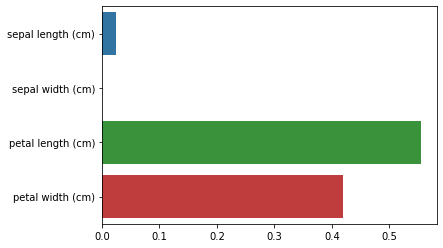

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))
    
# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names) 

- petal length의 중요도가 가장 높다
---

### 결정 트리 과적합(Overfitting)
사이킷런의 make_classification()을 이용해 분류를 위한 테스트용 데이터를 만든다. 

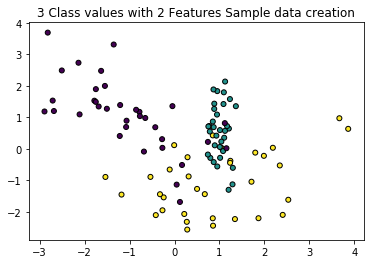

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해 피처 2개, 클래스 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표, 각 클래스 값은 다른 색으로 표현된다
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k') 

In [8]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1) 

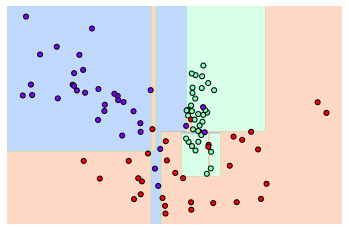

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels) 

- 일부 이상치 데이터까지 분류하기 위해 결정 기준 경계가 많아졌다. 
- 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 <br>하나만 존재해야하는 기준으로 인해 결정 기준 경계가 많고 복잡해졌다. 
- 이런 복잡한 모델은 다른 형태의 데이터 세트를 예측하면 정확도가 떨어진다. 따라서 min_samples_leaf=6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 규칙을 완화한다.

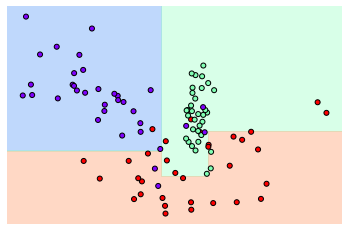

In [10]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels) 

- min_samples_leaf=6으로 트리 생성 조건을 제약한 모델이 예측 성능이 더 뛰어날 가능성이 높다.
- 테스트 데이터 세트는 학습 데이터 세트와 다른 데이터라서 학습 데이터에만 지나치게 최적화된 분류 기준이 테스트 데이터 세트에서는 정확도를 떨어뜨릴 수 있다. 
---

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
결정 트리를 이용해 사용자 행동 인식 데이터 세트에 대한 예측 분류를 수행한다. 
<br><br>
http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [5]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

NameError: name 'feature_name_df' is not defined

In [6]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())  

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [16]:
print(y_train['action'].value_counts()) 

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

# DecisionTreeClassfier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n',dt_clf.get_params()) 

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [18]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.5min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [19]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']] 

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [20]:
max_depths=[6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 성능 측정
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test, pred)
    print('max_depth = {0}, 정확도: {1:.4f}'.format(depth, accuracy)) 

max_depth = 6, 정확도: 0.8558
max_depth = 8, 정확도: 0.8707
max_depth = 10, 정확도: 0.8673
max_depth = 12, 정확도: 0.8646
max_depth = 16, 정확도: 0.8575
max_depth = 20, 정확도: 0.8548
max_depth = 24, 정확도: 0.8548


In [21]:
params={'max_depth':[6,8,10,12,16,20,24], 'min_samples_split':[16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [22]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy)) 

결정 트리 예측 정확도:0.8717


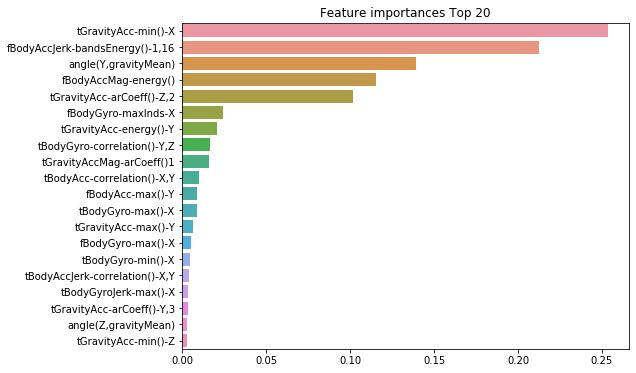

In [23]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show() 

## __04_03 앙상블 학습__
---

### 앙상블 학습 개요
__앙상블 학습을 통한 분류__는 여러 개의 분류기를 생성하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법이다.
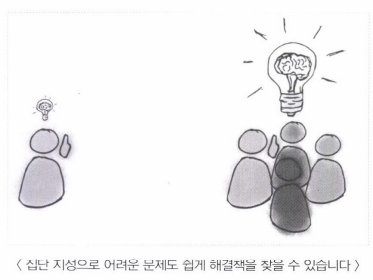
<br><br>
- 대부분의 정형 데이터 분류 시에 앙상블이 뛰어난 성능을 나타낸다. <br><br>랜덤 포레스트나 그레디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용,<br> 다양한 활용도로 인해 많이 사용됐다.<br><br>
- XGboost, LightGBM 같은 최신 앙상블 모델을 알고 있다면 정형 데이터의 분류 혹은 회귀 분야에서 예측 성능이 뛰어난 모델을 쉽게 만들 수 있다. <br><br>
- 앙상블 학습의 유형은 전통적으로 __보팅(Voting), 배깅(Bagging), 부스팅(Boosting)__의 세 가지로 나눈다. <br><br>
    - __보팅__: 선형 회귀, KNN, SVM의 3가지 ML알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 두고 보팅을 통해 최종 결과를 선정.
    - __배깅__: 단일 ML 알고리즘(결정 트리)으로 여러 분류기가 학습, 개별 예측을 한다. 개별 Classifier에게 데이터를 샘플링해서 추출하는 __부트스트래핑(Bootstrapping)__ 분할 방식을 사용하여, 원본 학습 데이터를 샘플링해 추출한다. 개별 분류기가 각각의 데이터 세트에 대해 학습, 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식.
    - __부스팅__: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 가중치를 부여하면서 학습, 예측 수행. <br> 부스팅의 대표적인 모듈로 그래디언트 부스트, XGBoost, LightGBM 이 있다. 
    - __스태킹__: 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과를 예측하는 방법.
    <br><br>
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식으로 같지만, <br><br> __보팅__은 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 <br> __배깅__은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게해 학습을 수행해 보팅을 수행하는 것이다.<br><br> 대표적인 배깅 방식이 __랜덤 포레스트 알고리즘__이다.


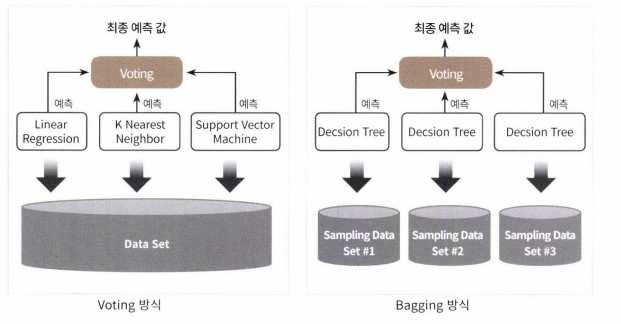

---

### 보팅 유형 - 하드 보팅(Hard Voting) 소프트 보팅(Soft Voting)
__하드 보팅__을 이용한 분류는 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정한다. <br><br>
__소프트 보팅__은 분류기들의 레이블 값 결정 확률을 모두 더하고 평균해서 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. 일반적으로 소프트 보팅을 많이 사용한다.
<br><br>
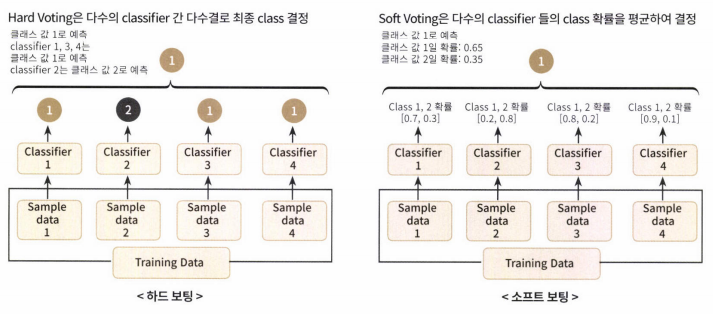

---


### 보팅 분류기(Voting Classifier)
보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석
<br><br>
- 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트로, 많은 피처를 가지고 있다.
<br><br>
- 사이킷런의 __load_breast_cancer()__함수를 이용해 데이터 세트 생성, 로지스틱 회귀와 KNN 기반으로 보팅 분류기를 만든다.

In [24]:
import pandas as pd

from sklearn.ensemble import VotingClassifier        # 보팅 분류기 생성
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')  # voting='hard'면 하드보팅
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassfier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test, pred))) 

# 개별 학습 모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf]
for classifiers in classifiers:
    classifiers.fit(X_train, y_train)
    pred=classifiers.predict(X_test)
    class_name=classifiers.__class__.__name__
    print('{0}정확도:{1:.4f}'.format(class_name, accuracy_score(y_test, pred))) 

Voting 분류기 정확도:0.9474
LogisticRegression정확도:0.9386
KNeighborsClassifier정확도:0.9386


- 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 예측 성능이 향상되지는 않는다.
- 다양한 관점을 가진 알고리즘이 서로 결함해 다양한 관점에서 서로의 약점을 보완, 높은 유연성을 가져야 새로운 문제에 대한 해결책을 더 쉽게 찾아낼 수 있다. 
- ML 모델의 성능은 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 평가요소이다.<br> 편향-분산 트레이드오프가 ML 모델이 극복해야 할 중요 과제
<br><br>
- 앙상블 학습에서는 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 평향-분산 트레이드오프 효과를 극대화할 수 있다. 
---

## __04_04 랜덤 포레스트__
---


### 랜덤 포레스트의 개요 및 실습
__배깅(bagging)__은 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘.<br>
배깅의 대표적 알고리즘으로 __랜덤 포레스트__가 있다. 
<br><br>
- 랜덤 포레스트는 비교적 빠른 수행 속도를 가지며 다양한 영역에서 높은 예측 성능을 보인다.<br> 기반 알고리즘은 결정 트리로, 쉽고 직관적이라는 장점을 그대로 가지고 있다. 
<br><br>
- 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 한다. 
<br><br>
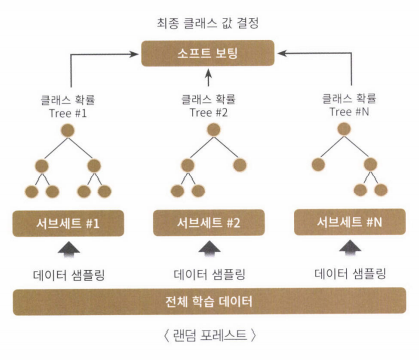
<br><br>
- 개별 트리가 학습하는 데이터는 부트스트래핑 분할 방식을 통해 전체 데이터에서 일부가 중첩되게 샘플링된 데이터이다. 임의로 만들어지며, 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어진다. 

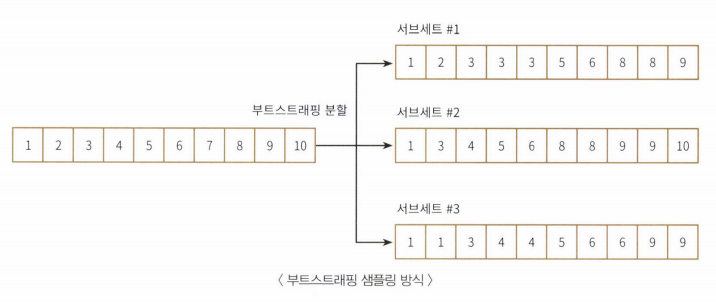
<br><br>
- 원본 데이터 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하기 위해<br> n_estimators=3 으로 하이퍼 파라미터를 부여하면 위의 사진처럼 섭셋이 만들어진다.
<br><br>
- __랜덤 포레스트__는 위 사진처럼 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test=get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy)) 

랜덤 포레스트 정확도:0.9253


### 램덤 포레스트 하이퍼 파라미터 및 튜닝
랜덤 포레스트는 결정 트리의 하이퍼 파라미터와 비슷한 파라미터를 가지고 있다. 
<br><br>
- __n_estimators__: 랜덤 포레스트에서 결정 트리의 개수를 지정한다. 디폴트 10개. 많을수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 무조건 성능이 향상되는 것은 아니다. 
- __max_features__: 결정 트리에 사용된 max_features와 같지만 랜덤 포레스트에서의 디폴트는 None이 아니라 auto이다. 랜덤 포레스트 트리를 분할하는 피처를 참조할 때 전체 피처 개수만큼 참조한다.
- __max_depth__나 __min_samples_leaf__와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터를 랜덤 포레스트에 똑같이 적용할 수 있다. 

In [27]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100], 'max_depth':[6,8,10,12], 
        'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 실행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)  # n_jobs=-1 추가하면 모든 CPU코어를 이용해 학습
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_)) 

최적 하이퍼 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


In [28]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                               min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred))) 

예측 정확도:0.9165


In [29]:
# 피처 중요도 막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importancse=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20] 

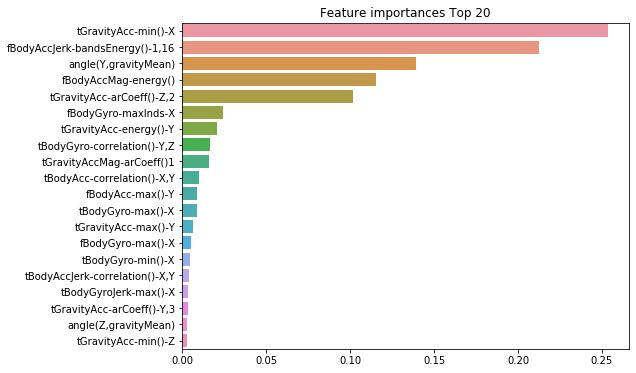

In [30]:
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show() 

## __04_05 GBM(Gradient Boosting Machine)__
---

### GBM의 개요 및 실습 
__부스팅 알고리즘__: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가며 학습하는 방식
<br><br>
- 부스팅의 대표적인 구현 AdaBoost(Adaptive Boosting), 그래디언트 부스팅
- __에이다 부스트__: 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
<br><br>
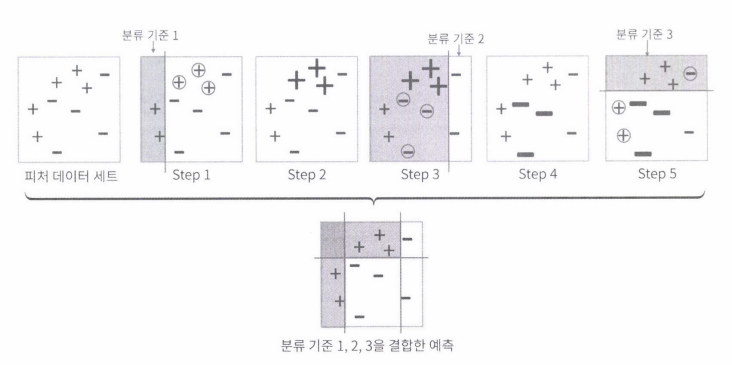
<br><br>
- 맨 왼쪽 그림과 같이 +, =로 된 피처 데이터 세트가 있다면
<br><br>
1. __Step1__ 첫번째 약한 학습기가 분류 기준 1로 +와 -를 분류 > 동그라미 +는 잘못 분류된 오류 데이터<br><br>
2. __Step2__ 오류 데이터에 대해 가중치를 부여 > 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 커짐<br><br>
3. __Step3__ 두번째 약한 학습기가 분류 기준 2로 +와 -를 분류 > 동그라미 -는 잘못 분류된 오류 데이터<br><br>
4. __Step4__ 오류 데이터에 대해 가중치 부여 > <br><br>
5. __Step5__ 세번째 약한 학습기가 분류 기준 3으로 +와 - 분류, 오류 데이터를 찾는다. <br><br>
 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측 수행<br><br>
6. __마지막__으로 아래 그림은 1, 2, 3번째 학습기를 모두 결합한 결과 예측으로, 훨씬 정확도가 높다.<br><br>


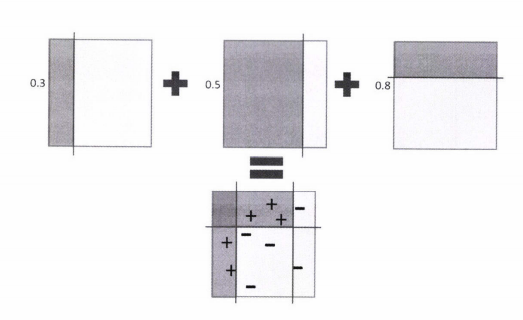
<br><br>
GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 차이가 있다.
<br>Gradient descent는 오류를 최소화하기 위해 반복적으로 가중치 값을 업데이트 한다. 

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9389
GBM 수행 시간: 638.8 초 


### GBM 하이퍼 파라미터 튜닝
-__loss__: Gradient descent에서 사용할 비용 함수 지정, 디폴트 'deviance'를 자주 사용<br><br>
-__learning_rate__: GBM이 학습을 진행할 때마다 적용하는 학습 툴. 약한 학습기가 오류 값을 보정해 나가는 데 적용하는 계수. 0~1 사이의 값을 지정할 수 있고 디폴트는 0.1이다.<br> 작은 값을 적용하면 수행 시간이 오래걸리지만 최소 오류 값을 찾아 예측 성능이 높아질 수 있지만, 큰 값을 적용하면 예측 성능이 떨어질 가능성이 높지만 빠른 수행이 가능하다.<br><br>
-__n_estimators__: 약한 학습기의 개수. 약한 학습기가 순차적으로 오류를 보정하기 때문에 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있다. 하지만 개수가 많을수록 시간이 오래걸린다. 디폴트는 100<br><br>
-__subsample__: 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율. 디폴트 1이고, 전체 학습 데이터를 기반으로 학습한다는 의미이다. 과적합이 염려되는 경우 1보다 작은 값으로 설정.<br><br>

In [ ]:
# GridSearchCV를 이용해 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100,500], 'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 116.3min finished


In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']] 

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred) 
print('GBM 예측 정확도:{0:.4f}'.format(gb_accuracy)) 